Bienvenido al simulador del brazo robótico

Menú de opciones:
1. Ingresar manualmente longitudes y ángulos
2. Exportar datos a CSV
3. Leer configuraciones desde CSV
4. Salir
Posiciones calculadas: Hombro: (0, 0), Codo: (np.float64(3.46), np.float64(-2.0)), Mano: (np.float64(12.86), np.float64(-5.42))


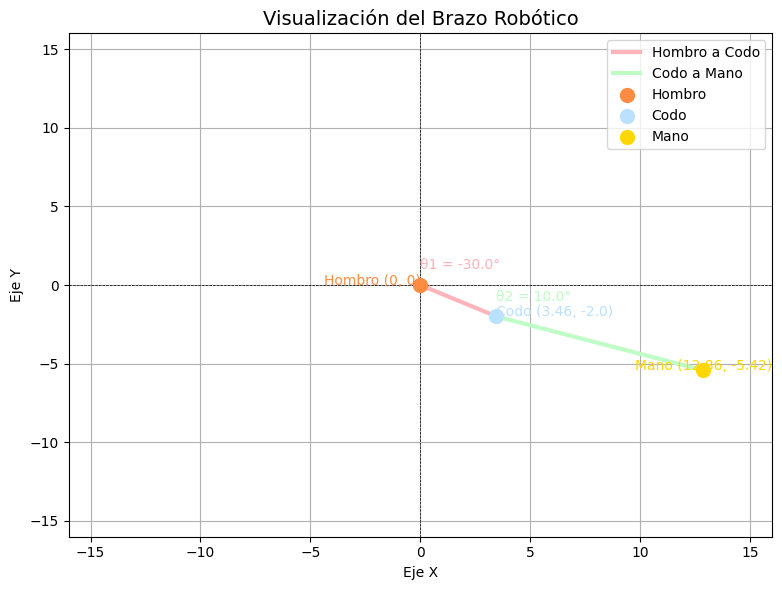


Menú de opciones:
1. Ingresar manualmente longitudes y ángulos
2. Exportar datos a CSV
3. Leer configuraciones desde CSV
4. Salir
Datos exportados correctamente a 'configuraciones_brazo_robotico.csv'.

Menú de opciones:
1. Ingresar manualmente longitudes y ángulos
2. Exportar datos a CSV
3. Leer configuraciones desde CSV
4. Salir
Datos exportados correctamente a 'configuraciones_brazo_robotico.csv'.

Menú de opciones:
1. Ingresar manualmente longitudes y ángulos
2. Exportar datos a CSV
3. Leer configuraciones desde CSV
4. Salir


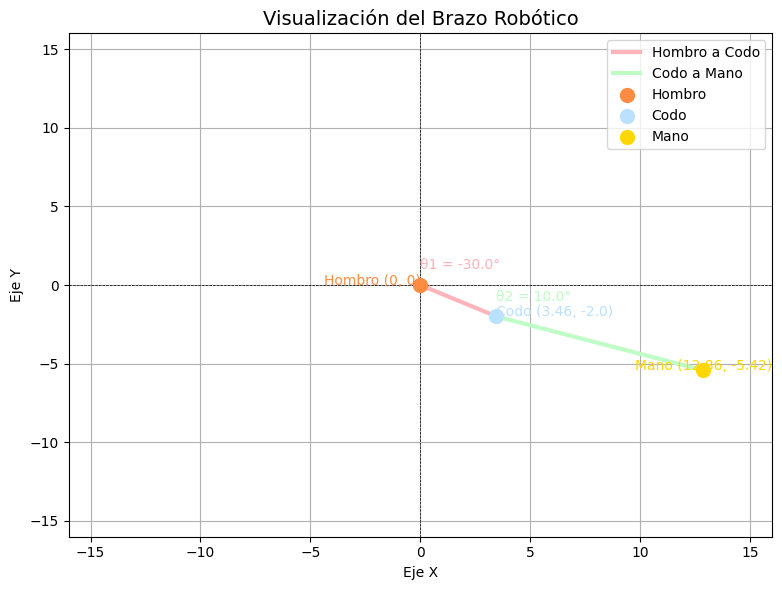


Menú de opciones:
1. Ingresar manualmente longitudes y ángulos
2. Exportar datos a CSV
3. Leer configuraciones desde CSV
4. Salir
Saliendo del programa...


In [1]:
# ==========================================================
# Importar librerías necesarias
# ==========================================================
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

# ==========================================================
# Funciones principales para cálculos y visualización
# ==========================================================

# Calcular las posiciones del brazo robótico (Hombro, Codo, Mano)
def calcular_posiciones(l1, l2, theta1, theta2):
    """
    Calcula las coordenadas de las articulaciones del brazo robótico en 2D.
    Parámetros:
        l1: Longitud del segmento entre el hombro y el codo.
        l2: Longitud del segmento entre el codo y la mano.
        theta1: Ángulo del hombro (en grados).
        theta2: Ángulo del codo (en grados).
    Retorna:
        Coordenadas del hombro, codo y mano en el sistema cartesiano.
    """
    theta1 = np.radians(theta1)
    theta2 = np.radians(theta2)
    x_codo = round(l1 * np.cos(theta1), 2)
    y_codo = round(l1 * np.sin(theta1), 2)
    x_mano = round(x_codo + l2 * np.cos(theta1 + theta2), 2)
    y_mano = round(y_codo + l2 * np.sin(theta1 + theta2), 2)
    return (0, 0), (x_codo, y_codo), (x_mano, y_mano)

# Graficar el brazo robótico en el plano cartesiano
def graficar_brazo(posiciones, l1, l2, theta1, theta2):
    """
    Visualiza el brazo robótico en el plano 2D.
    Parámetros:
        posiciones: Coordenadas calculadas (hombro, codo, mano).
        l1: Longitud del segmento 1.
        l2: Longitud del segmento 2.
        theta1: Ángulo del hombro (en grados).
        theta2: Ángulo del codo (en grados).
    """
    origen, codo, mano = posiciones

    # Configuración de la gráfica
    plt.figure(figsize=(8, 6))
    plt.plot([origen[0], codo[0]], [origen[1], codo[1]], color='#FFB3BA', linewidth=3, label="Hombro a Codo")
    plt.plot([codo[0], mano[0]], [codo[1], mano[1]], color='#BFFCC6', linewidth=3, label="Codo a Mano")
    
    # Puntos importantes (Hombro, Codo, Mano)
    plt.scatter(*origen, color='#FF8C42', label="Hombro", s=100, zorder=5)
    plt.scatter(*codo, color='#BAE1FF', label="Codo", s=100, zorder=5)
    plt.scatter(*mano, color='#FFD700', label="Mano", s=100, zorder=5)
    
    # Anotaciones y etiquetas
    plt.text(origen[0], origen[1], f'Hombro ({origen[0]}, {origen[1]})', fontsize=10, ha='right', color='#FF8C42')
    plt.text(codo[0], codo[1], f'Codo ({codo[0]}, {codo[1]})', fontsize=10, ha='left', color='#BAE1FF')
    plt.text(mano[0], mano[1], f'Mano ({mano[0]}, {mano[1]})', fontsize=10, ha='center', color='#FFD700')
    plt.annotate(f"θ1 = {theta1}°", (origen[0], origen[1] + 1), fontsize=10, color='#FFB3BA')
    plt.annotate(f"θ2 = {theta2}°", (codo[0], codo[1] + 1), fontsize=10, color='#BFFCC6')
    
    # Límites y estilo de la gráfica
    max_longitud = l1 + l2 + 2
    plt.xlim(-max_longitud, max_longitud)
    plt.ylim(-max_longitud, max_longitud)
    plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
    plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
    plt.grid(True)
    plt.title("Visualización del Brazo Robótico", fontsize=14)
    plt.xlabel("Eje X")
    plt.ylabel("Eje Y")
    plt.legend()
    plt.tight_layout()
    plt.show()

# ==========================================================
# Funciones para trabajar con archivos CSV
# ==========================================================

# Exportar configuraciones a un archivo CSV
def exportar_a_csv(l1, l2, configuraciones):
    """
    Exporta las configuraciones del brazo robótico a un archivo CSV.
    Parámetros:
        l1: Longitud del segmento 1.
        l2: Longitud del segmento 2.
        configuraciones: Lista de configuraciones con posiciones y ángulos.
    """
    data = {
        "Longitud Segmento 1": [round(l1, 2)] * len(configuraciones),
        "Longitud Segmento 2": [round(l2, 2)] * len(configuraciones),
        "Theta 1 (°)": [round(conf["theta1"], 2) for conf in configuraciones],
        "Theta 2 (°)": [round(conf["theta2"], 2) for conf in configuraciones],
        "Hombro (x, y)": ["(0.00, 0.00)"] * len(configuraciones),
        "Codo (x, y)": [f"({conf['codo'][0]}, {conf['codo'][1]})" for conf in configuraciones],
        "Mano (x, y)": [f"({conf['mano'][0]}, {conf['mano'][1]})" for conf in configuraciones]
    }
    df = pd.DataFrame(data)
    df.to_csv("configuraciones_brazo_robotico.csv", index=False)
    print("Datos exportados correctamente a 'configuraciones_brazo_robotico.csv'.")

# Leer configuraciones desde un archivo CSV y graficarlas
def leer_desde_csv(nombre_archivo):
    """
    Lee configuraciones desde un archivo CSV y las visualiza.
    Parámetros:
        nombre_archivo: Nombre del archivo CSV a leer.
    """
    try:
        df = pd.read_csv(nombre_archivo)
        if not {"Longitud Segmento 1", "Longitud Segmento 2", "Theta 1 (°)", "Theta 2 (°)"}.issubset(df.columns):
            raise ValueError("El archivo CSV no contiene las columnas necesarias.")
        for _, row in df.iterrows():
            l1, l2, theta1, theta2 = row["Longitud Segmento 1"], row["Longitud Segmento 2"], row["Theta 1 (°)"], row["Theta 2 (°)"]
            posiciones = calcular_posiciones(l1, l2, theta1, theta2)
            graficar_brazo(posiciones, l1, l2, theta1, theta2)
    except FileNotFoundError:
        print(f"El archivo '{nombre_archivo}' no existe.")
    except Exception as e:
        print(f"Error: {e}")

# ==========================================================
# Menú interactivo para el usuario
# ==========================================================

def menu_interactivo():
    """
    Proporciona un menú interactivo para gestionar las operaciones del brazo robótico.
    """
    print("Bienvenido al simulador del brazo robótico")
    configuraciones = []
    while True:
        print("\nMenú de opciones:")
        print("1. Ingresar manualmente longitudes y ángulos")
        print("2. Exportar datos a CSV")
        print("3. Leer configuraciones desde CSV")
        print("4. Salir")
        opcion = input("Elige una opción: ")
        
        if opcion == "1":
            l1 = float(input("Longitud del segmento 1 (hombro a codo): "))
            l2 = float(input("Longitud del segmento 2 (codo a mano): "))
            theta1 = float(input("Ángulo del hombro (θ1, en grados): "))
            theta2 = float(input("Ángulo del codo (θ2, en grados): "))
            posiciones = calcular_posiciones(l1, l2, theta1, theta2)
            print(f"Posiciones calculadas: Hombro: {posiciones[0]}, Codo: {posiciones[1]}, Mano: {posiciones[2]}")
            configuraciones.append({"l1": l1, "l2": l2, "theta1": theta1, "theta2": theta2, "codo": posiciones[1], "mano": posiciones[2]})
            graficar_brazo(posiciones, l1, l2, theta1, theta2)
        elif opcion == "2":
            if configuraciones:
                exportar_a_csv(configuraciones[0]["l1"], configuraciones[0]["l2"], configuraciones)
            else:
                print("No hay configuraciones para exportar.")
        elif opcion == "3":
            nombre_archivo = input("Ingresa el nombre del archivo CSV: ")
            leer_desde_csv(nombre_archivo)
        elif opcion == "4":
            print("Saliendo del programa...")
            break
        else:
            print("Opción no válida. Inténtalo de nuevo.")

# ==========================================================
# Ejecutar el programa
# ==========================================================
menu_interactivo()